### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.interpolate import make_interp_spline

### Importing & loading data

In [2]:
KSM = pd.read_csv('Cholera linelist data.csv')
KSM

,Sex,Age in Years,County,S/County,Ward,Estate/Village,Landmark,Reporting Facility,Date seen at health facility,Date of onset of illness,...,Is case a contact of confirmed case? Yes/No,What is the Water Source for the case?,Is any form of water treatment available for the household of the case? Yes/No,"If yes, what type of water treatment?",Is a toilet/pit latrine available in the home? Yes/No,Is the toilet/piot latrine shared with other household? Yes/No,"If shared, by how many households?",Travel History,contact dosing,Remarks
0,M,56.00,Homa Bay,Kasipul,Unknown,Konuong'a,Oyugis,JOOTRH,13-Mar-23,11-Mar-23,...,No,Unknown,NaN,NaN,Unknown,Unknown,NaN,Travelled from his work place in Siaya to Homa...,Done,"Case reffered by Sagam Hospital , no refferal ..."
1,F,22.00,Kisumu,Kisumu East,Nyalenda A,Libeto,UDS CBO,KCRH,16-Mar-23,16-Mar-23,...,No,Spring Water,No,NaN,Yes,Yes,5,None,not done,HH Contacts hostile hence not listed
2,M,60.00,Kisumu,Kisumu Central,Nyalenda B,Kapuothe,Ring Road school,KCRH,25-Mar-23,24-Mar-23,...,No,Tap Water,No,No,yes,No,NaN,No,Done,"Case supplied with bar soaps,aquatabs,jerrican..."
3,F,17.00,Kisumu,Kisumu East,Kajulu,Mamboleo,NaN,Kisumu specialist,"2nd A pril,2023",30-Mar-23,...,Unknown,Tap Water -school set up,Unknown,unknown,Yes,No,NaN,Yes-From Kakamega,Done,Case a refferal from Mukumu Girls
4,M,2.75,Kisumu,Kisumu East,Nyalenda A,Capital,shofco library,JOOTRH,5-Apr-23,2-Apr-23,...,no,Tap Water,No,NaN,Yes,Yes,4,No,Done,Contact tracing ongoing
5,F,32.00,Kisumu,Kisumu East,Nyalenda A,Kanyakwar Kachok,Pinochio Primary Primary,JOOTRH,9-Apr-23,6-Apr-23,...,NaN,Tap water/shallow well,No,NaN,NaN,NaN,NaN,Unknown,unknown,Risk factor ;contaminated water sources with f...
6,F,28.00,Kisumu,Kisumu Central,Market Milimani,Township,Oile Market,KCRH,12-Apr-23,11-Apr-23,...,No,Tap Water,No,NaN,Yes,yes,public toilet,No,not done,"Case from street family,contacts not reached"
7,F,24.00,Kisumu,Kisumu Central,Nyalenda B,Kapuothe,Unknown,Dunga HC,12-Apr-23,11-Apr-23,...,No,Tap,No,NaN,NaN,NaN,NaN,NaN,NaN,Case lost to follow up
8,M,9.00,Kisumu,Kisumu East,Nyalenda A,Kanyakwar Kachok,Pinochio Primary Primary,KCRH,13-Apr-23,11-Apr-23,...,No,Tap water/shallow well,No,NaN,yes,yes,15,None,Done,Contacts listed and advised to quarantine
9,M,51.00,Kisumu,Kisumu East,Nyalenda A,Kanyakwar Kachok,Lucky Bar,KCRH,14-Apr-23,12-Apr-23,...,No,Tap water/shallow well,No,NaN,yes,yes,20,None,yes,Risk factor ;contaminated water sources with f...


### Checking Missing data

In [3]:
KSM.isnull().sum()

Sex                                                                                0
Age in Years                                                                       0
County                                                                             0
S/County                                                                           0
Ward                                                                               1
Estate/Village                                                                     0
Landmark                                                                           1
Reporting Facility                                                                 0
Date seen at health facility                                                       0
Date of onset of illness                                                          24
Specimen taken? Yes/No                                                            24
If yes, date specimen taken                                      

### Replacing missing data

In [4]:
KSM_NEW=KSM.fillna('Not Known')
KSM_NEW

,Sex,Age in Years,County,S/County,Ward,Estate/Village,Landmark,Reporting Facility,Date seen at health facility,Date of onset of illness,...,Is case a contact of confirmed case? Yes/No,What is the Water Source for the case?,Is any form of water treatment available for the household of the case? Yes/No,"If yes, what type of water treatment?",Is a toilet/pit latrine available in the home? Yes/No,Is the toilet/piot latrine shared with other household? Yes/No,"If shared, by how many households?",Travel History,contact dosing,Remarks
0,M,56.00,Homa Bay,Kasipul,Unknown,Konuong'a,Oyugis,JOOTRH,13-Mar-23,11-Mar-23,...,No,Unknown,Not Known,Not Known,Unknown,Unknown,Not Known,Travelled from his work place in Siaya to Homa...,Done,"Case reffered by Sagam Hospital , no refferal ..."
1,F,22.00,Kisumu,Kisumu East,Nyalenda A,Libeto,UDS CBO,KCRH,16-Mar-23,16-Mar-23,...,No,Spring Water,No,Not Known,Yes,Yes,5,None,not done,HH Contacts hostile hence not listed
2,M,60.00,Kisumu,Kisumu Central,Nyalenda B,Kapuothe,Ring Road school,KCRH,25-Mar-23,24-Mar-23,...,No,Tap Water,No,No,yes,No,Not Known,No,Done,"Case supplied with bar soaps,aquatabs,jerrican..."
3,F,17.00,Kisumu,Kisumu East,Kajulu,Mamboleo,Not Known,Kisumu specialist,"2nd A pril,2023",30-Mar-23,...,Unknown,Tap Water -school set up,Unknown,unknown,Yes,No,Not Known,Yes-From Kakamega,Done,Case a refferal from Mukumu Girls
4,M,2.75,Kisumu,Kisumu East,Nyalenda A,Capital,shofco library,JOOTRH,5-Apr-23,2-Apr-23,...,no,Tap Water,No,Not Known,Yes,Yes,4,No,Done,Contact tracing ongoing
5,F,32.00,Kisumu,Kisumu East,Nyalenda A,Kanyakwar Kachok,Pinochio Primary Primary,JOOTRH,9-Apr-23,6-Apr-23,...,Not Known,Tap water/shallow well,No,Not Known,Not Known,Not Known,Not Known,Unknown,unknown,Risk factor ;contaminated water sources with f...
6,F,28.00,Kisumu,Kisumu Central,Market Milimani,Township,Oile Market,KCRH,12-Apr-23,11-Apr-23,...,No,Tap Water,No,Not Known,Yes,yes,public toilet,No,not done,"Case from street family,contacts not reached"
7,F,24.00,Kisumu,Kisumu Central,Nyalenda B,Kapuothe,Unknown,Dunga HC,12-Apr-23,11-Apr-23,...,No,Tap,No,Not Known,Not Known,Not Known,Not Known,Not Known,Not Known,Case lost to follow up
8,M,9.00,Kisumu,Kisumu East,Nyalenda A,Kanyakwar Kachok,Pinochio Primary Primary,KCRH,13-Apr-23,11-Apr-23,...,No,Tap water/shallow well,No,Not Known,yes,yes,15,None,Done,Contacts listed and advised to quarantine
9,M,51.00,Kisumu,Kisumu East,Nyalenda A,Kanyakwar Kachok,Lucky Bar,KCRH,14-Apr-23,12-Apr-23,...,No,Tap water/shallow well,No,Not Known,yes,yes,20,None,yes,Risk factor ;contaminated water sources with f...


In [5]:
KSM_NEW.isnull().sum()

Sex                                                                               0
Age in Years                                                                      0
County                                                                            0
S/County                                                                          0
Ward                                                                              0
Estate/Village                                                                    0
Landmark                                                                          0
Reporting Facility                                                                0
Date seen at health facility                                                      0
Date of onset of illness                                                          0
Specimen taken? Yes/No                                                            0
If yes, date specimen taken                                                 

In [6]:
KSM_NEW.shape

(58, 33)

In [7]:
KSM_FILTERED = KSM_NEW.drop(KSM_NEW.columns[[4,5,6]], axis =1)
KSM_FILTERED

,Sex,Age in Years,County,S/County,Reporting Facility,Date seen at health facility,Date of onset of illness,Specimen taken? Yes/No,"If yes, date specimen taken",Type of specimen,...,Is case a contact of confirmed case? Yes/No,What is the Water Source for the case?,Is any form of water treatment available for the household of the case? Yes/No,"If yes, what type of water treatment?",Is a toilet/pit latrine available in the home? Yes/No,Is the toilet/piot latrine shared with other household? Yes/No,"If shared, by how many households?",Travel History,contact dosing,Remarks
0,M,56.00,Homa Bay,Kasipul,JOOTRH,13-Mar-23,11-Mar-23,Yes,13-Mar-23,Rectal swab,...,No,Unknown,Not Known,Not Known,Unknown,Unknown,Not Known,Travelled from his work place in Siaya to Homa...,Done,"Case reffered by Sagam Hospital , no refferal ..."
1,F,22.00,Kisumu,Kisumu East,KCRH,16-Mar-23,16-Mar-23,Yes,16-Mar-23,Rectal swab,...,No,Spring Water,No,Not Known,Yes,Yes,5,None,not done,HH Contacts hostile hence not listed
2,M,60.00,Kisumu,Kisumu Central,KCRH,25-Mar-23,24-Mar-23,Yes,25-Mar-23,Rectal swab,...,No,Tap Water,No,No,yes,No,Not Known,No,Done,"Case supplied with bar soaps,aquatabs,jerrican..."
3,F,17.00,Kisumu,Kisumu East,Kisumu specialist,"2nd A pril,2023",30-Mar-23,Yes,Not Known,Rectal swab,...,Unknown,Tap Water -school set up,Unknown,unknown,Yes,No,Not Known,Yes-From Kakamega,Done,Case a refferal from Mukumu Girls
4,M,2.75,Kisumu,Kisumu East,JOOTRH,5-Apr-23,2-Apr-23,Yes,5-Apr-23,Stool,...,no,Tap Water,No,Not Known,Yes,Yes,4,No,Done,Contact tracing ongoing
5,F,32.00,Kisumu,Kisumu East,JOOTRH,9-Apr-23,6-Apr-23,Yes,13-Apr-23,Not taken,...,Not Known,Tap water/shallow well,No,Not Known,Not Known,Not Known,Not Known,Unknown,unknown,Risk factor ;contaminated water sources with f...
6,F,28.00,Kisumu,Kisumu Central,KCRH,12-Apr-23,11-Apr-23,Yes,12-Apr-23,Rectal swab,...,No,Tap Water,No,Not Known,Yes,yes,public toilet,No,not done,"Case from street family,contacts not reached"
7,F,24.00,Kisumu,Kisumu Central,Dunga HC,12-Apr-23,11-Apr-23,Yes,Not taken,Rectal swab,...,No,Tap,No,Not Known,Not Known,Not Known,Not Known,Not Known,Not Known,Case lost to follow up
8,M,9.00,Kisumu,Kisumu East,KCRH,13-Apr-23,11-Apr-23,Yes,13-Apr-23,Rectal swab,...,No,Tap water/shallow well,No,Not Known,yes,yes,15,None,Done,Contacts listed and advised to quarantine
9,M,51.00,Kisumu,Kisumu East,KCRH,14-Apr-23,12-Apr-23,Yes,14-Apr-23,Rectal swab,...,No,Tap water/shallow well,No,Not Known,yes,yes,20,None,yes,Risk factor ;contaminated water sources with f...


In [8]:
list(KSM_FILTERED.columns)

['Sex',
 'Age in Years',
 'County',
 'S/County ',
 'Reporting Facility',
 'Date seen at health facility',
 'Date of onset of illness',
 'Specimen taken? Yes/No',
 'If yes, date specimen taken',
 'Type of specimen',
 'Presenting Symptoms',
 'Clinical Diagnosis',
 'Laboratory Diagnosis',
 'Date of laboratory diagnosis',
 'Was case admitted? Yes/No',
 'If yes, admission facility?',
 'Date of admission',
 'Date of discharge/outcome',
 'Outcome',
 'Is case a contact of a suspected case? Yes/No',
 'Is case a contact of confirmed case? Yes/No',
 'What is the Water Source for the case?',
 'Is any form of water treatment available for the household of the case? Yes/No',
 'If yes, what type of water treatment?',
 'Is a toilet/pit latrine available in the home? Yes/No',
 'Is the toilet/piot latrine shared with other household? Yes/No',
 'If shared, by how many households?',
 'Travel History ',
 'contact dosing ',
 'Remarks']

In [9]:
dictionary = {
     'DEAD': ['Dead','DEAD'],
     'RECOVERED' : ['Recovered','Case stable ,recovered'],
     'CONVALENSCING' : ['Stable/isolated','Isolated','Stable','Alive and stable','stable','Stable and alive',
                        'Alive, on home quarantine','Alive , on home quarantine',
                        'Seen Outpatient','Case seen outpatient , stable','Case stable'],
     'NOT KNOWN' : ['On admission ,sample collected for culture ,RDT test Positive to cholera',
                    'Isolated awaiting results','Not Known']
           
}

updated_records = []

for records in KSM_FILTERED['Outcome']:
    for level,entries in dictionary.items():
        if records in entries:
            updated_records.append(level)
            break
    
            
            
updated_records
KSM_FILTERED['Outcome'] = updated_records
KSM_FILTERED['Outcome']

0              DEAD
1         RECOVERED
2         RECOVERED
3         NOT KNOWN
4         RECOVERED
5         NOT KNOWN
6         RECOVERED
7         RECOVERED
8         RECOVERED
9         RECOVERED
10    CONVALENSCING
11        RECOVERED
12             DEAD
13    CONVALENSCING
14    CONVALENSCING
15        NOT KNOWN
16        NOT KNOWN
17        NOT KNOWN
18        NOT KNOWN
19        NOT KNOWN
20        NOT KNOWN
21        NOT KNOWN
22        NOT KNOWN
23        NOT KNOWN
24        NOT KNOWN
25        NOT KNOWN
26        NOT KNOWN
27        NOT KNOWN
28        NOT KNOWN
29        NOT KNOWN
30        NOT KNOWN
31        NOT KNOWN
32        NOT KNOWN
33        NOT KNOWN
34        NOT KNOWN
35        NOT KNOWN
36        NOT KNOWN
37        NOT KNOWN
38        NOT KNOWN
39    CONVALENSCING
40    CONVALENSCING
41             DEAD
42    CONVALENSCING
43    CONVALENSCING
44    CONVALENSCING
45    CONVALENSCING
46    CONVALENSCING
47    CONVALENSCING
48    CONVALENSCING
49    CONVALENSCING


In [10]:
water = {
       'SPRING WATER': ['Spring Water'],
       'TAP WATER' : ['Tap Water','Tap Water -school set up','Tap','Tap water','Tap Water ,Lake'],
       'SHALLOW WELL' : ['Tap water/shallow well','Tap /shaloow well',
                       'Tap/ Shalow well','Tap water / shallow well'],
       'BORE HOLE' : ['Bore Hole  ','Protected Borehole'],
       'NOT KNOWN' :['Not Known','Unknown']
     }

water_source = []

for source in KSM_FILTERED['What is the Water Source for the case?']:
    for level,entries in water.items():
        if source in entries:
            water_source.append(level)
            break
       
water_source 
KSM_FILTERED['What is the Water Source for the case?'] = water_source
KSM_FILTERED['What is the Water Source for the case?']

0        NOT KNOWN
1     SPRING WATER
2        TAP WATER
3        TAP WATER
4        TAP WATER
5     SHALLOW WELL
6        TAP WATER
7        TAP WATER
8     SHALLOW WELL
9     SHALLOW WELL
10    SHALLOW WELL
11    SHALLOW WELL
12       BORE HOLE
13    SHALLOW WELL
14    SHALLOW WELL
15       NOT KNOWN
16       NOT KNOWN
17       NOT KNOWN
18       NOT KNOWN
19       NOT KNOWN
20       NOT KNOWN
21       NOT KNOWN
22       NOT KNOWN
23       NOT KNOWN
24       NOT KNOWN
25       NOT KNOWN
26       NOT KNOWN
27       NOT KNOWN
28       NOT KNOWN
29       NOT KNOWN
30       NOT KNOWN
31       NOT KNOWN
32       NOT KNOWN
33       NOT KNOWN
34       NOT KNOWN
35       NOT KNOWN
36       NOT KNOWN
37       NOT KNOWN
38       NOT KNOWN
39    SHALLOW WELL
40    SHALLOW WELL
41    SHALLOW WELL
42    SHALLOW WELL
43    SHALLOW WELL
44    SHALLOW WELL
45    SHALLOW WELL
46    SHALLOW WELL
47       BORE HOLE
48    SHALLOW WELL
49       BORE HOLE
50       TAP WATER
51       TAP WATER
52       TAP

In [11]:
what_treatment_available = {
                             'NONE': ['Not Known','No','unknown'],
                             'AQUATAB' : ['Aquatab']
       }

TREATMENT_AVAILABLE = []

for type_of_treatment_available in KSM_FILTERED['If yes, what type of water treatment?']:
    for level,entries in what_treatment_available.items():
        if type_of_treatment_available in entries:
            TREATMENT_AVAILABLE.append(level)
            break
       
TREATMENT_AVAILABLE
KSM_FILTERED['If yes, what type of water treatment?'] = TREATMENT_AVAILABLE
KSM_FILTERED['If yes, what type of water treatment?']

0        NONE
1        NONE
2        NONE
3        NONE
4        NONE
5        NONE
6        NONE
7        NONE
8        NONE
9        NONE
10       NONE
11       NONE
12       NONE
13       NONE
14       NONE
15       NONE
16       NONE
17       NONE
18       NONE
19       NONE
20       NONE
21       NONE
22       NONE
23       NONE
24       NONE
25       NONE
26       NONE
27       NONE
28       NONE
29       NONE
30       NONE
31       NONE
32       NONE
33       NONE
34       NONE
35       NONE
36       NONE
37       NONE
38       NONE
39       NONE
40       NONE
41       NONE
42       NONE
43       NONE
44       NONE
45       NONE
46       NONE
47       NONE
48       NONE
49       NONE
50       NONE
51    AQUATAB
52       NONE
53       NONE
54       NONE
55       NONE
56       NONE
57       NONE
Name: If yes, what type of water treatment?, dtype: object

In [12]:
waste_disposal_response = {
         'YES' : ['Yes','yes','YES'],
         'NO' : ['Unknown','Not Known']
     }

waste_disposal = []

for availability in KSM_FILTERED['Is a toilet/pit latrine available in the home? Yes/No']:
    for level,entries in waste_disposal_response.items():
        if availability in entries:
            waste_disposal.append(level)
            break
waste_disposal
KSM_FILTERED['Is a toilet/pit latrine available in the home? Yes/No'] =waste_disposal
KSM_FILTERED['Is a toilet/pit latrine available in the home? Yes/No']

0      NO
1     YES
2     YES
3     YES
4     YES
5      NO
6     YES
7      NO
8     YES
9     YES
10     NO
11    YES
12     NO
13     NO
14     NO
15     NO
16     NO
17     NO
18     NO
19     NO
20     NO
21     NO
22     NO
23     NO
24     NO
25     NO
26     NO
27     NO
28     NO
29     NO
30     NO
31     NO
32     NO
33     NO
34     NO
35     NO
36     NO
37     NO
38     NO
39    YES
40    YES
41    YES
42    YES
43    YES
44    YES
45    YES
46    YES
47    YES
48    YES
49    YES
50    YES
51    YES
52    YES
53    YES
54    YES
55    YES
56    YES
57    YES
Name: Is a toilet/pit latrine available in the home? Yes/No, dtype: object

In [13]:
lab_summary = {
       'Positive': ['Vibrio Cholerae Ogawa','Vibrio Cholerae Ogawa ,Entamoeba Hystolyca','Vibrio Cholera Ogawa','Vibrio Cholerae Ogawa ','Vibrio Cholera Ogawa'],
       'Inconclusive' : ['Positive to RDT','No Vibrio Isolated','No Vibrio Isolated, SAT negative'],
       'UNKNWON' : ['Not Known','Sample not collected','Not Known','Unknown','Not applicable'],
       'Awaiting reuslts' : ['Awaiting result','awaiting result','Awaiting Result'],
       
       }

lab_diagnosis = []

for Lab_outcome in KSM_FILTERED['Laboratory Diagnosis']:
    for level,entries in lab_summary.items():
        if Lab_outcome in entries:
            lab_diagnosis.append(level)
            break
       
lab_diagnosis
KSM_FILTERED['Laboratory Diagnosis'] = lab_diagnosis
KSM_FILTERED['Laboratory Diagnosis']

0             Positive
1             Positive
2             Positive
3         Inconclusive
4             Positive
5     Awaiting reuslts
6             Positive
7              UNKNWON
8             Positive
9             Positive
10        Inconclusive
11            Positive
12        Inconclusive
13        Inconclusive
14        Inconclusive
15             UNKNWON
16             UNKNWON
17             UNKNWON
18             UNKNWON
19             UNKNWON
20             UNKNWON
21             UNKNWON
22             UNKNWON
23             UNKNWON
24             UNKNWON
25             UNKNWON
26             UNKNWON
27             UNKNWON
28             UNKNWON
29             UNKNWON
30             UNKNWON
31             UNKNWON
32             UNKNWON
33             UNKNWON
34             UNKNWON
35             UNKNWON
36             UNKNWON
37             UNKNWON
38             UNKNWON
39    Awaiting reuslts
40        Inconclusive
41             UNKNWON
42            Positive
43        I

In [14]:
clinical_summary = {
                    'SUSPECTED CHOLERA':['Suspected Cholera','Suspected cholera','Suspected Cholera,Guardiasis','Suspected Cholera ,G.E'],
                           'Acute G.E' :['Acute GE','Acute GE/Cholera','Acute G.E/Suspected Cholera','GE'],
                           'Diarrhoea' :['Acute diarrhea','Diarrhoea','Diarrhea','Diarrhoea Dehydration','Acute Diarrhea'],
                          'Amoebiasis' :['Amoebiasis'],
                     'OTHER DISEASES'  : ['Diarrhoea/Malaria','Diarrhoea/Allergic Dermatitis'] 

}

clinical_diagnosis = []

for Clinical_outcome in KSM_FILTERED['Clinical Diagnosis']:
    for level,entries in clinical_summary.items():
        if Clinical_outcome in entries:
            clinical_diagnosis.append(level)
            break
            
clinical_diagnosis
KSM_FILTERED['Clinical Diagnosis'] = clinical_diagnosis
KSM_FILTERED['Clinical Diagnosis']

0     SUSPECTED CHOLERA
1     SUSPECTED CHOLERA
2     SUSPECTED CHOLERA
3             Acute G.E
4     SUSPECTED CHOLERA
5             Acute G.E
6     SUSPECTED CHOLERA
7     SUSPECTED CHOLERA
8             Acute G.E
9     SUSPECTED CHOLERA
10            Acute G.E
11            Acute G.E
12    SUSPECTED CHOLERA
13    SUSPECTED CHOLERA
14    SUSPECTED CHOLERA
15       OTHER DISEASES
16       OTHER DISEASES
17            Diarrhoea
18            Acute G.E
19            Diarrhoea
20            Acute G.E
21            Acute G.E
22            Diarrhoea
23            Diarrhoea
24            Acute G.E
25            Acute G.E
26            Diarrhoea
27            Diarrhoea
28            Diarrhoea
29            Diarrhoea
30            Diarrhoea
31            Diarrhoea
32            Acute G.E
33            Diarrhoea
34           Amoebiasis
35            Diarrhoea
36            Diarrhoea
37            Diarrhoea
38            Diarrhoea
39    SUSPECTED CHOLERA
40    SUSPECTED CHOLERA
41    SUSPECTED 

In [15]:
age_limits = [0,5,19,35,65,100]
age_groups = ['0-4','5-18','19-34','35-64','65+']
KSM_FILTERED['Age Groups'] = pd.cut(KSM_FILTERED['Age in Years'], bins=age_limits, labels=age_groups)
KSM_FILTERED['Age Groups']

0     35-64
1     19-34
2     35-64
3      5-18
4       0-4
5     19-34
6     19-34
7     19-34
8      5-18
9     35-64
10    19-34
11     5-18
12      65+
13    35-64
14    19-34
15     5-18
16     5-18
17    19-34
18     5-18
19    35-64
20     5-18
21     5-18
22      0-4
23      0-4
24      0-4
25     5-18
26      0-4
27      0-4
28      0-4
29    19-34
30      0-4
31    35-64
32      0-4
33      0-4
34    19-34
35    19-34
36    19-34
37    19-34
38    35-64
39     5-18
40     5-18
41      65+
42     5-18
43    19-34
44     5-18
45     5-18
46    35-64
47     5-18
48    19-34
49    35-64
50    19-34
51    35-64
52    35-64
53    35-64
54     5-18
55    19-34
56    35-64
57     5-18
Name: Age Groups, dtype: category
Categories (5, object): ['0-4' < '5-18' < '19-34' < '35-64' < '65+']

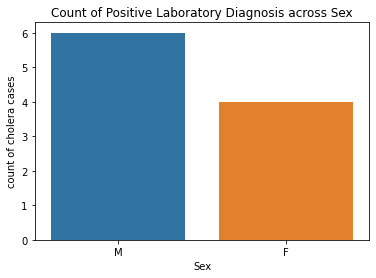

In [16]:
cholera_cases = KSM_FILTERED[KSM_FILTERED['Laboratory Diagnosis'] == 'Positive']
sns.countplot(x='Sex',data = cholera_cases )
plt.title('Count of Positive Laboratory Diagnosis across Sex')
plt.xlabel('Sex')
plt.ylabel('count of cholera cases')
plt.show()

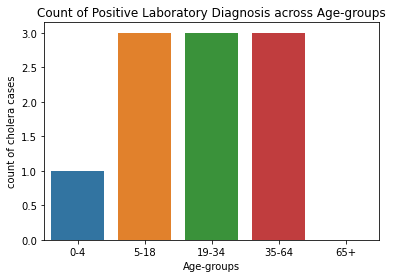

In [17]:
sns.countplot(x='Age Groups', data =cholera_cases)
plt.title('Count of Positive Laboratory Diagnosis across Age-groups')
plt.xlabel('Age-groups')
plt.ylabel('count of cholera cases')
plt.show()

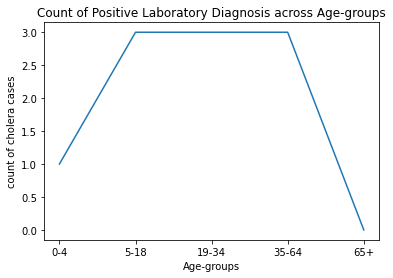

In [18]:
count_by_age_group = cholera_cases['Age Groups'].value_counts().sort_index()
sns.lineplot(x=count_by_age_group.index, y=count_by_age_group.values)
plt.title('Count of Positive Laboratory Diagnosis across Age-groups')
plt.xlabel('Age-groups')
plt.ylabel('count of cholera cases')
plt.show()

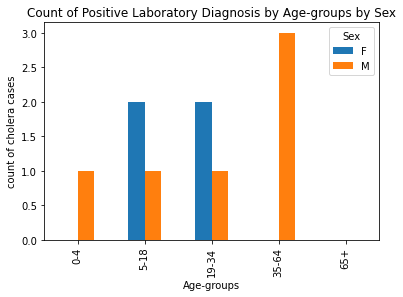

In [19]:
count_of_age_group_by_sex = cholera_cases.groupby(['Age Groups','Sex']).size().unstack(fill_value=0)
count_of_age_group_by_sex.plot(kind='bar')
plt.title('Count of Positive Laboratory Diagnosis by Age-groups by Sex')
plt.xlabel('Age-groups')
plt.ylabel('count of cholera cases')
plt.show()

In [20]:
cross_tabulation = pd.crosstab(index=KSM_FILTERED['Presenting Symptoms'],columns = [KSM_FILTERED['Age Groups']])
cross_tabulation['Total'] = cross_tabulation.sum(axis=1)
cross_tabulation['Total']

Presenting Symptoms
Acute Rice Watery ,Vommitting                                                                          1
Acute Rice Watery Diarhea                                                                              1
Acute Rice Watery Diarrhea                                                                             1
Acute rice watery diarhea                                                                              2
Acute rice watery diarrhea                                                                             1
Acute rice watery diarrhoea with two episodes of vomiting                                              6
Acute rice watery diarrhoea with vommitting                                                            1
Acutr Rice watery diarrhoea with two episodes of vomiting                                              1
Aute rice water with diarrhoea                                                                         1
Diarhea and vommitting several epis

In [21]:
contigency = pd.crosstab(index=KSM_FILTERED['Laboratory Diagnosis'],
                               columns = [KSM_FILTERED['Is any form of water treatment available for the household of the case? Yes/No']])
                               
contigency


Is any form of water treatment available for the household of the case? Yes/No,No,Not Known,Unknown,Yes
Laboratory Diagnosis,,,,
Awaiting reuslts,7,0,0,1
Inconclusive,7,0,1,0
Positive,9,1,0,0
UNKNWON,32,0,0,0


In [22]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contigency)
print(p)
print(chi2)
print(dof)
print(expected)

0.04136446596683606
17.505454545454544
9
[[ 7.5862069   0.13793103  0.13793103  0.13793103]
 [ 7.5862069   0.13793103  0.13793103  0.13793103]
 [ 9.48275862  0.17241379  0.17241379  0.17241379]
 [30.34482759  0.55172414  0.55172414  0.55172414]]


In [23]:
def lab_dignosis(x):
    if x in['Awaiting reuslts','Inconclusive','UNKNWON']:
        return 'Negative'
    else:
        return 'Positive'
KSM_FILTERED['lab_dignosis'] = KSM_FILTERED['Laboratory Diagnosis'].apply(lab_dignosis)
KSM_FILTERED['lab_dignosis']

0     Positive
1     Positive
2     Positive
3     Negative
4     Positive
5     Negative
6     Positive
7     Negative
8     Positive
9     Positive
10    Negative
11    Positive
12    Negative
13    Negative
14    Negative
15    Negative
16    Negative
17    Negative
18    Negative
19    Negative
20    Negative
21    Negative
22    Negative
23    Negative
24    Negative
25    Negative
26    Negative
27    Negative
28    Negative
29    Negative
30    Negative
31    Negative
32    Negative
33    Negative
34    Negative
35    Negative
36    Negative
37    Negative
38    Negative
39    Negative
40    Negative
41    Negative
42    Positive
43    Negative
44    Negative
45    Negative
46    Negative
47    Negative
48    Positive
49    Negative
50    Negative
51    Negative
52    Negative
53    Negative
54    Negative
55    Negative
56    Negative
57    Negative
Name: lab_dignosis, dtype: object

In [24]:
contigency_water_source = pd.crosstab(index=KSM_FILTERED['lab_dignosis'],
                               columns = [KSM_FILTERED['What is the Water Source for the case?']])
contigency_water_source

What is the Water Source for the case?,BORE HOLE,NOT KNOWN,SHALLOW WELL,SPRING WATER,TAP WATER
lab_dignosis,,,,,
Negative,3,24,12,0,9
Positive,0,1,5,1,3


In [25]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contigency_water_source)
print(p)
print(chi2)
print(dof)
print(expected)

0.029299449944387438
10.76795588235294
4
[[ 2.48275862 20.68965517 14.06896552  0.82758621  9.93103448]
 [ 0.51724138  4.31034483  2.93103448  0.17241379  2.06896552]]


In [26]:
def source_water(x):
    if x in['TAP WATER','SPRING WATER']:
        return 'Clean water'
    else:
        return 'Unclean water'
KSM_FILTERED['source_water'] = KSM_FILTERED['What is the Water Source for the case?'].apply(source_water)
KSM_FILTERED['source_water']

0     Unclean water
1       Clean water
2       Clean water
3       Clean water
4       Clean water
5     Unclean water
6       Clean water
7       Clean water
8     Unclean water
9     Unclean water
10    Unclean water
11    Unclean water
12    Unclean water
13    Unclean water
14    Unclean water
15    Unclean water
16    Unclean water
17    Unclean water
18    Unclean water
19    Unclean water
20    Unclean water
21    Unclean water
22    Unclean water
23    Unclean water
24    Unclean water
25    Unclean water
26    Unclean water
27    Unclean water
28    Unclean water
29    Unclean water
30    Unclean water
31    Unclean water
32    Unclean water
33    Unclean water
34    Unclean water
35    Unclean water
36    Unclean water
37    Unclean water
38    Unclean water
39    Unclean water
40    Unclean water
41    Unclean water
42    Unclean water
43    Unclean water
44    Unclean water
45    Unclean water
46    Unclean water
47    Unclean water
48    Unclean water
49    Unclean water


In [27]:
source_water = pd.crosstab(index=KSM_FILTERED['source_water'],
                               columns = [KSM_FILTERED['lab_dignosis']])
source_water

lab_dignosis,Negative,Positive
source_water,,
Clean water,9,4
Unclean water,39,6


In [28]:
from scipy.stats import fisher_exact
oddsratio, p_value = fisher_exact(source_water)
print(p_value)
print(oddsratio)

0.2082742215812458
0.34615384615384615


Using,Chisquare there is a significant relationship between source of water and the laboratory outcome,albeit weak.

N/B:To decisively establish this association,the test ought to be carried out on a larger sample.